In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

asset_returns_orig = pd.read_csv('asset_returns.csv', index_col='Year', parse_dates=True)
asset_weights = pd.read_csv('asset_weights.csv', index_col='asset_class')
cols = ['Global Bonds (Unhedged)','Total US Bond Market','US Large Cap Growth',
            'US Large Cap Value','US Small Cap Growth','US Small Cap Value','Emerging Markets',
            'Intl Developed ex-US Market','Short Term Treasury']
asset_returns = asset_returns_orig[cols].dropna()
treasury_rate = asset_returns['Short Term Treasury']
asset_returns = asset_returns[cols[:-1]].astype('float').dropna()
asset_weights = asset_weights.loc[cols[:-1]]

In [38]:
asset_returns.tail()

,Global Bonds (Unhedged),Total US Bond Market,US Large Cap Growth,US Large Cap Value,US Small Cap Growth,US Small Cap Value,Emerging Markets,Intl Developed ex-US Market
Year,,,,,,,,
2016-01-01,0.04,0.03,0.06,0.17,0.11,0.25,0.12,0.02
2017-01-01,0.09,0.03,0.28,0.17,0.22,0.12,0.31,0.26
2018-01-01,-0.04,0.00,-0.03,-0.06,-0.06,-0.12,-0.15,-0.14
2019-01-01,0.07,0.09,0.37,0.26,0.33,0.23,0.20,0.22
2020-01-01,0.04,0.06,0.22,-0.13,0.09,-0.16,0.00,-0.09


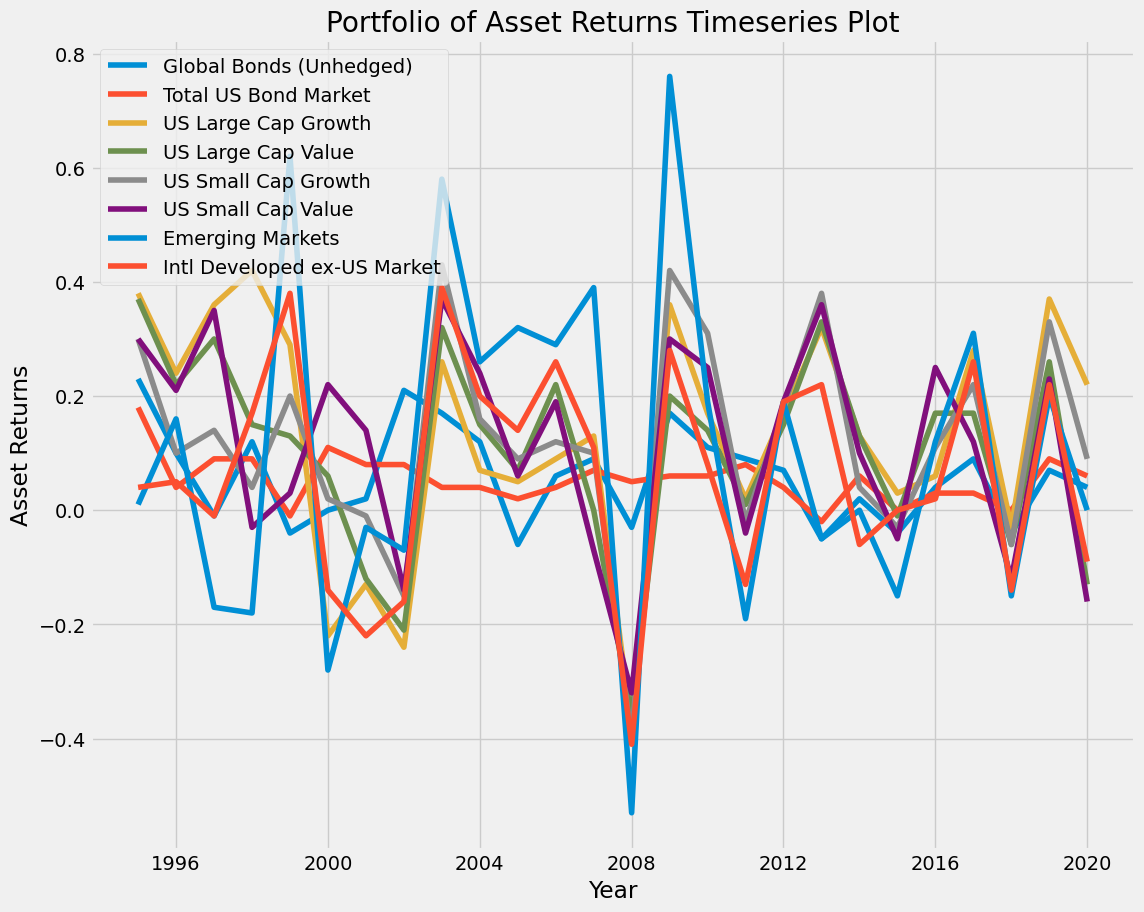

In [42]:
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Year")
plt.ylabel("Asset Returns")
plt.title("Portfolio of Asset Returns Timeseries Plot")
 
# plotting the "A" column and "A" column
# of Rolling Dataframe (window_size  = 20)
plt.plot(asset_returns, label= asset_returns.columns.values)
plt.legend(loc='upper left')
plt.show()

In [6]:
asset_weights

,weight
asset_class,
Global Bonds (Unhedged),0.224
Total US Bond Market,0.077
US Large Cap Growth,0.163
US Large Cap Value,0.162
US Small Cap Growth,0.022
US Small Cap Value,0.022
Emerging Markets,0.030
Intl Developed ex-US Market,0.299


In [5]:
asset_returns.mean()

Global Bonds (Unhedged)        0.059615
Total US Bond Market           0.054231
US Large Cap Growth            0.131538
US Large Cap Value             0.102308
US Small Cap Growth            0.119615
US Small Cap Value             0.114615
Emerging Markets               0.100000
Intl Developed ex-US Market    0.063462
dtype: float64

In [7]:
excess_asset_returns = asset_returns.subtract(treasury_rate, axis=0)
cov = excess_asset_returns.cov()
global_return = excess_asset_returns.mean().multiply(asset_weights['weight'].values).sum()
market_var = np.matmul(asset_weights.values.reshape(len(asset_weights)).T,
                                       np.matmul(cov.values, asset_weights.values.reshape(len(asset_weights))))
print(f'The global market mean return is {global_return:.4f} and the variance is {market_var:.6}')
risk_aversion = global_return / market_var
print(f'The risk aversion parameter is {risk_aversion:.2f}')

The global market mean return is 0.0446 and the variance is 0.0202548
The risk aversion parameter is 2.20


In [8]:
def implied_rets(risk_aversion, sigma, w):
    
    implied_rets = risk_aversion * sigma.dot(w).squeeze()
    
    return implied_rets
implied_equilibrium_returns = implied_rets(risk_aversion, cov, asset_weights)
implied_equilibrium_returns

Global Bonds (Unhedged)        0.012871
Total US Bond Market           0.002439
US Large Cap Growth            0.060436
US Large Cap Value             0.051548
US Small Cap Growth            0.056798
US Small Cap Value             0.043902
Emerging Markets               0.076184
Intl Developed ex-US Market    0.063076
Name: weight, dtype: float64

In [23]:
# Let us set up 3 views we might have regarding some of the assets in our portfolio:
#
# View 1: ‘Emerging Markets’ will have an absolute excess return of 9.25% 
#          (as opposed to the 7.62% equilibrium based value)
#
# View 2: US Large Cap Growth and US Small Cap Growth will outperform US Large Cap Value and 
#         US Small Cap Value by 0.5% ((as opposed to the 1%-1.2% equilibrium based value)
#
# View 3: ‘Intl Developed ex-US Market’ will have an absolute excess return of 5.5% 
#         (as opposed to the 6.31% equilibrium based value).

In [24]:
Q = np.array([0.0925, 0.005, 0.055])

In [25]:
# The first row of Matrix P represents View 1, where ‘Emerging Markets’ are the asset concerned – 
# this is 7th along the top row to represent the fact it is the 7th asset class in our example
# View 2 and View 3 are represented by Row 2 and Row 3, respectively.

In [26]:
P = np.asarray([[0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, .85, -.85, .15, -.15, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 1]])

In [27]:
view1_var = np.matmul(P[0].reshape(len(P[0])),np.matmul(cov.values, P[0].reshape(len(P[0])).T))
view2_var = np.matmul(P[1].reshape(len(P[1])),np.matmul(cov.values, P[1].reshape(len(P[1])).T))
view3_var = np.matmul(P[2].reshape(len(P[2])),np.matmul(cov.values, P[2].reshape(len(P[2])).T))
print(f'The Variance of View 1 Portfolio is {view1_var}, and the standard deviation is {np.sqrt(view1_var):.3f}\n',\
      f'The Variance of View 2 Portfolio is {view2_var}, and the standard deviation is {np.sqrt(view2_var):.3f}\n',\
      f'The Variance of View 3 Portfolio is {view3_var}, and the standard deviation is {np.sqrt(view3_var):.3f}')

The Variance of View 1 Portfolio is 0.09655215384615386, and the standard deviation is 0.311
 The Variance of View 2 Portfolio is 0.014389680384615407, and the standard deviation is 0.120
 The Variance of View 3 Portfolio is 0.04505784615384616, and the standard deviation is 0.212


In [28]:
def error_cov_matrix(sigma, tau, P):
    matrix = np.diag(np.diag(P.dot(tau * cov).dot(P.T)))
    return matrix
tau = 0.025
omega = error_cov_matrix(cov, tau, P)

In [29]:
sigma_scaled = cov * tau
BL_return_vector = implied_equilibrium_returns + sigma_scaled.dot(P.T).dot(inv(P.dot(sigma_scaled).dot(P.T) + omega).dot(Q - P.dot(implied_equilibrium_returns)))

In [30]:
BL_return_vector

Global Bonds (Unhedged)        0.013157
Total US Bond Market           0.002431
US Large Cap Growth            0.057505
US Large Cap Value             0.050891
US Small Cap Growth            0.056636
US Small Cap Value             0.044942
Emerging Markets               0.079098
Intl Developed ex-US Market    0.062403
dtype: float64

In [31]:
# Even though the expressed views only directly involved 6 of the 8 asset classes, the individual returns 
# of all the assets changed from their respective Implied Equilibrium returns. 
# We compare the new return vector with the original Implied Return Vector below:

In [32]:
returns_table = pd.concat([implied_equilibrium_returns, BL_return_vector], axis=1) * 100
returns_table.columns = ['Implied Returns', 'BL Return Vector']
returns_table['Difference'] = returns_table['BL Return Vector'] - returns_table['Implied Returns']
returns_table.style.format('{:,.2f}%')

,Implied Returns,BL Return Vector,Difference
Global Bonds (Unhedged),1.29%,1.32%,0.03%
Total US Bond Market,0.24%,0.24%,-0.00%
US Large Cap Growth,6.04%,5.75%,-0.29%
US Large Cap Value,5.15%,5.09%,-0.07%
US Small Cap Growth,5.68%,5.66%,-0.02%
US Small Cap Value,4.39%,4.49%,0.10%
Emerging Markets,7.62%,7.91%,0.29%
Intl Developed ex-US Market,6.31%,6.24%,-0.07%


In [33]:
# We can now calculate the new Black Litterman based weights vector as follows:

In [34]:
inverse_cov = pd.DataFrame(inv(cov.values), index=cov.columns, columns=cov.index)
BL_weights_vector = inverse_cov.dot(BL_return_vector)
BL_weights_vector = BL_weights_vector/sum(BL_weights_vector)

In [35]:
# We compare the new weights vector with the original Market Cap Weights below and 
# the Mean-Variance optimised weights (assuming we use the historic mean annual return 
# as the return vector input):

In [36]:
# Calculate mean-variance optimised weights
MV_weights_vector = inverse_cov.dot(excess_asset_returns.mean())
MV_weights_vector = MV_weights_vector/sum(MV_weights_vector)
weights_table = pd.concat([BL_weights_vector, asset_weights, MV_weights_vector], axis=1) * 100
weights_table.columns = ['BL Weights', 'Market Cap Weights', 'Mean-Var Weights']
weights_table['BL/Mkt Cap Diff'] = weights_table['BL Weights'] - weights_table['Market Cap Weights']
weights_table.style.format('{:,.2f}%')

,BL Weights,Market Cap Weights,Mean-Var Weights,BL/Mkt Cap Diff
Global Bonds (Unhedged),22.69%,22.40%,-13.99%,0.29%
Total US Bond Market,7.80%,7.70%,107.26%,0.10%
US Large Cap Growth,10.06%,16.30%,17.54%,-6.24%
US Large Cap Value,22.86%,16.20%,-19.05%,6.66%
US Small Cap Growth,1.09%,2.20%,-1.82%,-1.11%
US Small Cap Value,3.37%,2.20%,16.43%,1.17%
Emerging Markets,9.42%,3.00%,6.39%,6.42%
Intl Developed ex-US Market,22.73%,29.90%,-12.75%,-7.17%


In [ ]:
# Below is a visualisation of the various asset class weightings corresponding to:

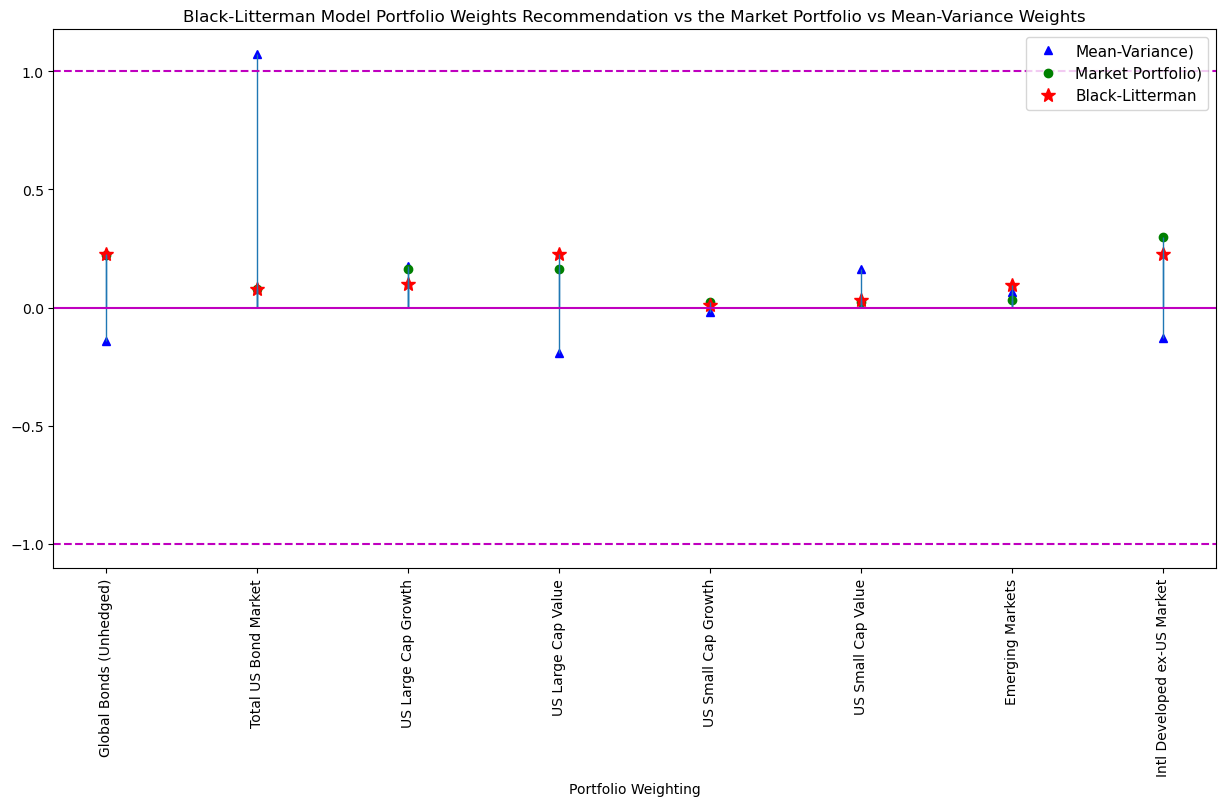

In [22]:
import matplotlib.pyplot as plt
N = BL_weights_vector.shape[0]
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Black-Litterman Model Portfolio Weights Recommendation vs the Market Portfolio vs Mean-Variance Weights')
ax.plot(np.arange(N)+1, MV_weights_vector, '^', c='b', label='Mean-Variance)')
ax.plot(np.arange(N)+1, asset_weights, 'o', c='g', label='Market Portfolio)')
ax.plot(np.arange(N)+1, BL_weights_vector, '*', c='r',markersize=10, label='Black-Litterman')
ax.vlines(np.arange(N)+1, 0, BL_weights_vector, lw=1)
ax.vlines(np.arange(N)+1, 0, MV_weights_vector, lw=1)
ax.vlines(np.arange(N)+1, 0, asset_weights, lw=1)
ax.axhline(0, c='m')
ax.axhline(-1, c='m', ls='--')
ax.axhline(1, c='m', ls='--')
ax.set_xlabel('Assets')
ax.set_xlabel('Portfolio Weighting')
ax.xaxis.set_ticks(np.arange(1, N+1, 1))
ax.set_xticklabels(asset_weights.index.values)
plt.xticks(rotation=90, )
plt.legend(numpoints=1, fontsize=11)
plt.show()

In [ ]:
# One thing to notice is just how much the Mean-Variance weightings vary, 
# with far more “extreme” allocations being seen (e.g. over 100% weighting in US Bonds 
# and short positions in Global Bonds, US Large Cap Value and Intl Developed ex-US Market).